   Iteración        xl   xu        xr     f(xr)     f(xl)     Error
0        1.0  2.011131  4.0  2.011131  1.404753  1.582942  2.011131
1        2.0  2.629469  4.0  2.629469  0.288649  1.404753  0.618337
2        3.0  2.745745  4.0  2.745745  0.017269  0.288649  0.116277
3        4.0  2.752663  4.0  2.752663  0.000681  0.017269  0.006918


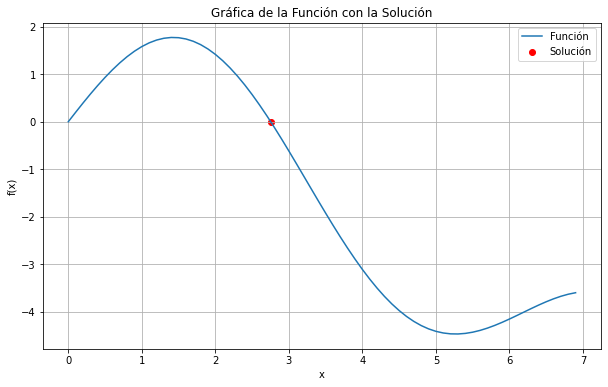

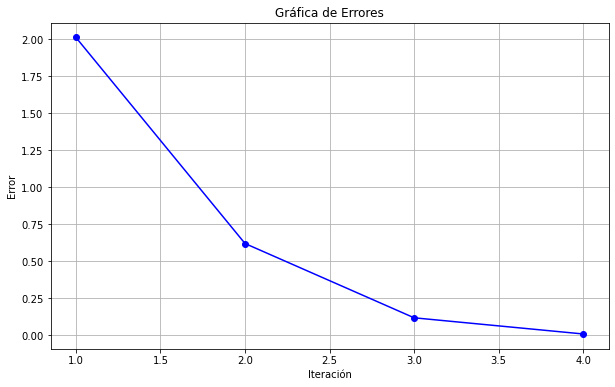

In [4]:
import math
import pandas as pd
import matplotlib.pyplot as plt

def funcion(x):
    return 2 * math.sin(x) - (x**2 / 10)

def metodo_falsa_posicion(funcion, xl, xu, tol=0.01):
    iteraciones = 0
    error = xu - xl
    xr_ant = 0
    
    tabla = pd.DataFrame(columns=['Iteración', 'xl', 'xu', 'xr', 'f(xr)', 'f(xl)', 'Error'])
    
    while abs(error) > tol:
        xr = (xl * funcion(xu) - xu * funcion(xl)) / (funcion(xu) - funcion(xl))
        fxr = funcion(xr)
        fxl = funcion(xl)
        
        if fxr * fxl < 0:
            xu = xr
        else:
            xl = xr
        
        error = xr - xr_ant
        xr_ant = xr
        iteraciones += 1
        
        tabla = tabla.append({'Iteración': iteraciones, 'xl': xl, 'xu': xu, 'xr': xr, 'f(xr)': fxr, 'f(xl)': fxl, 'Error': error}, ignore_index=True)
    
    return xr, tabla

# Valores iniciales
xl = 1
xu = 4

solucion, tabla = metodo_falsa_posicion(funcion, xl, xu)

print(tabla)

x = [i / 10 for i in range(70)]
y = [funcion(xi) for xi in x]

# Gráfica de la función
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Función')
plt.scatter(solucion, funcion(solucion), color='red', label='Solución')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de la Función con la Solución')
plt.legend()
plt.grid()
plt.show()

errores = tabla['Error'].abs()

# Gráfica del error
plt.figure(figsize=(10, 6))
plt.plot(tabla['Iteración'], errores, marker='o', linestyle='-', color='blue')
plt.xlabel('Iteración')
plt.ylabel('Error')
plt.title('Gráfica de Errores')
plt.grid()
plt.show()